# Recognizing hand-written digits

#### Importation des packages

In [34]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

### Digits dataset

### 1. Problematique

Recognizing handwritten est un problème de classification

Dans ce projet, nous utilisons le jeu de données Handwritten Digits qui est déjà prêt dans la bibliothèque sklearn. nous pouvons importer l'ensemble de données en utilisant le code ci-dessous.

### Exploration de données

Chaque point de données est une image 8x8 d'un chiffre.
<img src ="image.png">

In [35]:
digits = datasets.load_digits()

In [36]:
print(digits.images.shape)
print(digits.target_names.shape)
#print(digits.images.min())

(1797, 8, 8)
(10,)


En python, la dir fonction renvoie les noms des attributs d'un objet, c'est-à-dire quelles informations sont stockées dans l'objet sous la forme d'autres objets. Utilisons cette fonction pour vérifier ce qui peut être trouvé dans l'objet digits :

In [37]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [38]:
# print type(digits.images)
# print type(digits.target)
digits.images.shape

(1797, 8, 8)

In [39]:
print (digits.images[0].shape)

(8, 8)


<Figure size 640x480 with 0 Axes>

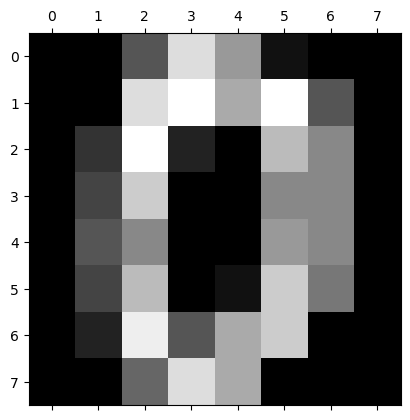

In [40]:
#Affichons une image voir
plt.gray()
plt.matshow(digits.images[0])

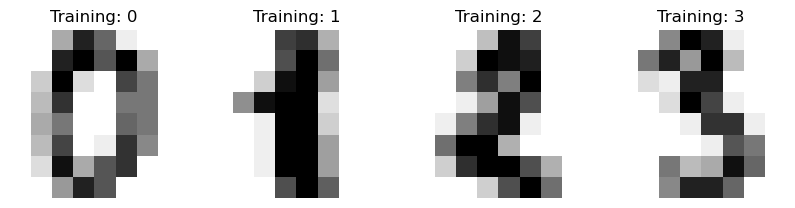

In [41]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r,  interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [42]:
digits = datasets.load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

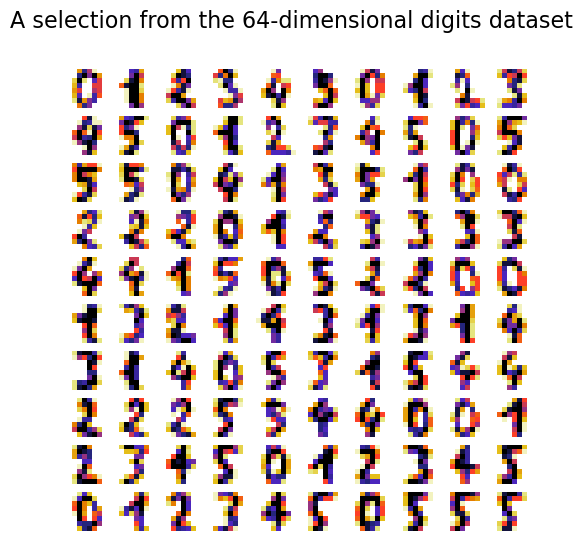

In [43]:
#Exemple
#CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', vmin=0, vmax=100
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap='CMRmap_r', )
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

# Les Détails de l'apprentisage

### Pre-Processing

In [44]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

### Modele

In [45]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

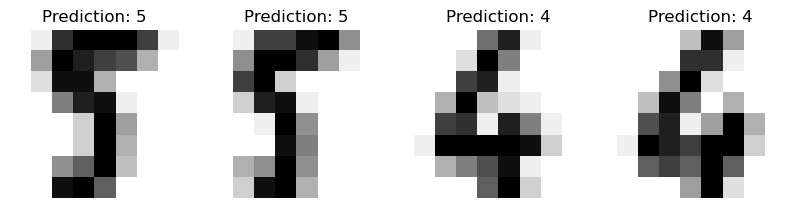

In [46]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

# Les métriques d’évaluation

Cas multi-classe : une probabilité est prédite pour chaque classe. Exemple : chaque image a une certaine probabilité d’être 0, 1 etc...

In [47]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.98      0.98        91
           2       0.97      0.98      0.97        86
           3       0.98      0.95      0.96        91
           4       0.99      0.97      0.98        93
           5       0.94      1.00      0.97        93

    accuracy                           0.98       542
   macro avg       0.98      0.98      0.98       542
weighted avg       0.98      0.98      0.98       542




## Matrice de Confusion

Comme la prédiction multi-classe ne repose pas sur un seuil de classification, elle possède une unique matrice de confusion standard du modèle, à la différence du cas binaire où de nombreuses matrices de confusion sont possibles (selon la valeur du seuil). Cette matrice est organisée de la même façon que la matrice de confusion binaire, avec en ligne les labels prédits et en colonne les labels réels. Seulement, au lieu d’avoir 2 lignes et 2 colonnes (classes 0 et 1), la matrice de confusion multi-classe a $n_{class}$ lignes et $n_{class}$ colonnes où $n_{class}$ est le nombre de classes du problème.

Confusion matrix:
[[87  0  0  0  1  0]
 [ 0 89  1  0  0  1]
 [ 0  0 84  2  0  0]
 [ 0  0  2 86  0  3]
 [ 0  1  0  0 90  2]
 [ 0  0  0  0  0 93]]


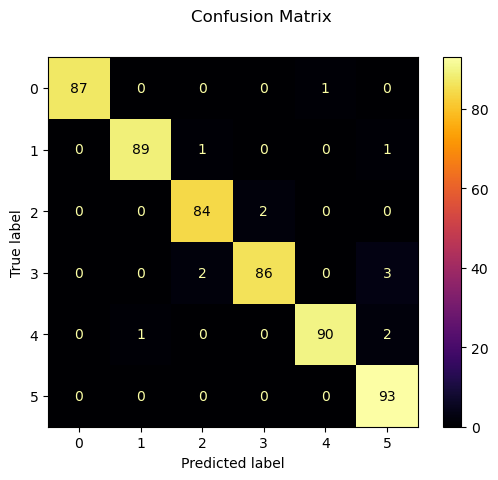

In [48]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Les faux négatifs se trouvent dans les colonnes (predict label) associées à chaque classe et les faux positifs se trouvent dans les lignes (prédiction) associées à chaque classe.